Exercise 2: Practice\
Jupyter notebook submission\
by Group 1

We start with the usual import statement for this task, copy-pasted from the example notebook.

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()
import sklearn.datasets
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import hinge_loss

After this we have the copy-pasted plotting function for the fitted SVC. We have changed nothing, in order to not break it.

In [ ]:
#Plotting Function (Same as the one in the Notebook from Professor Angulo's Notebook)
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
 
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                 model.support_vectors_[:, 1], s=100);
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

First part of the exercise is to (in our case) select a dataset with 200-1000 training vectors and less than 5 dimensions.

In [ ]:
#Exercise one of the Coding Part -> Choose a Dataset with 200 to 1000 Instances and at Most 5 dimensions
X,y = sklearn.datasets.load_breast_cancer(return_X_y=True)
print("Shape of feature Matrix: ", X.shape)
print("Shape of Labels: ", y.shape)

#Feature Matrix has too many Dimensions
X_new = X[:,:5]
print("Shape of new feature Matrix: ", X_new.shape) 
#-> Feature now fullfills Criteria of having 5 Columns

#Scaling the Data so the Attributes are equally scales
scaler = StandardScaler()
scaler.fit(X_new)
X_scaled = scaler.transform(X_new)

Shape of feature Matrix:  (569, 30)
Shape of Labels:  (569,)
Shape of new feature Matrix:  (569, 5)


Second part of the exercise was to select two dimensions to make plotting easier or at all possble. We decided to use PCA for this operation.

In [ ]:
#Exercise two of the Coding Part -> Select 2 Dimensions by using PCA
import sklearn.decomposition as decomp
pca = decomp.PCA(n_components = 2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

print("Dimensions of the Feature Matrix after using PCA: ", X_pca.shape)


Dimensions of the Feature Matrix after using PCA:  (569, 2)


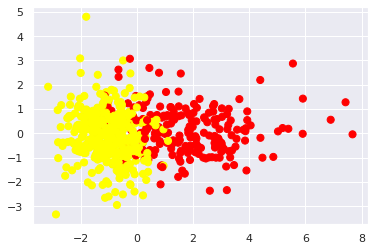

In [ ]:
#Plotting the resulting Features
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, s=50, cmap='autumn');

Part three of the exercise was to do at least five Experiments with the data chosen or constructed. They are performed and plotted below.

Loss Linear Kernel and C=1:  0.4622


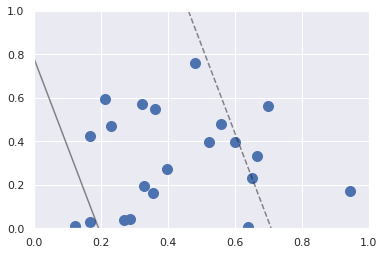

In [ ]:
#Experiment 1 -> Linear Kernel, C=1
lin_model = SVC(kernel='linear', C=1)
lin_model.fit(X_pca, y)

#Predict
y_pred_lin = lin_model.predict(X_pca)

#Loss Calculation
err_lin = hinge_loss(y, y_pred_lin)
err_lin = round(err_lin,4) #optional, but it makes it easier to compare with the eye
print("Loss Linear Kernel and C=1: ", err_lin)

plot_svc_decision_function(lin_model);

Loss Polynomial Kernel and C=1:  0.536


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: No contour levels were found within the data range.


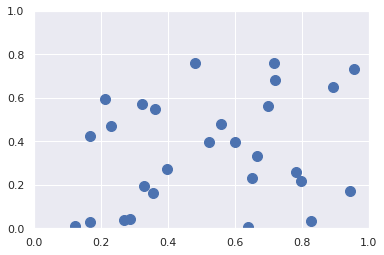

In [ ]:
#Experiment 2 -> Polynomial Kernel (degree = 5), C=1
poly_model = SVC(kernel='poly', C=1, degree=5)
poly_model.fit(X_pca, y)

#Predict
y_pred_poly = poly_model.predict(X_pca)

#Loss Calculation
err_poly = hinge_loss(y, y_pred_poly)
err_poly = round(err_poly,4) #optional, but it makes it easier to compare with the eye
print("Loss Polynomial Kernel and C=1: ", err_poly)

plot_svc_decision_function(poly_model);

Loss Gaussian Kernel and C=1:  0.4569


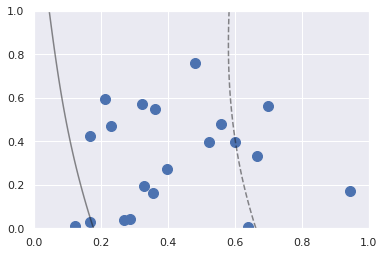

In [ ]:
#Experiment 3 -> Gaussian Kernel, C=1
gaussian_model = SVC(kernel='rbf', C=1)
gaussian_model.fit(X_pca, y)

#Predict
y_pred_gaussian = gaussian_model.predict(X_pca)

#Loss Calculation
err_gaussian = hinge_loss(y, y_pred_gaussian)
err_gaussian = round(err_gaussian,4) #optional, but it makes it easier to compare with the eye
print("Loss Gaussian Kernel and C=1: ", err_gaussian)

plot_svc_decision_function(gaussian_model);

Loss Linear Kernel and C=1000:  0.4587


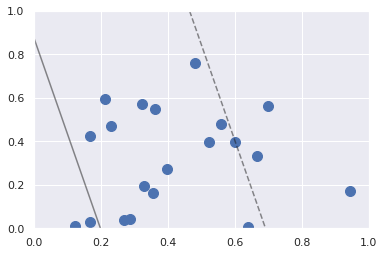

In [ ]:
#Experiment 4 -> Linear Kernel, C=1000
lin_model2 = SVC(kernel='linear', C=1000)
lin_model2.fit(X_pca, y)

#Predict
y_pred_lin2 = lin_model2.predict(X_pca)

#Loss Calculation
err_lin2 = hinge_loss(y, y_pred_lin2)
err_lin2 = round(err_lin2,4) #optional, but it makes it easier to compare with the eye
print("Loss Linear Kernel and C=1000: ", err_lin2)

plot_svc_decision_function(lin_model2);

Loss Polynomial Kernel and C=1000:  0.4956


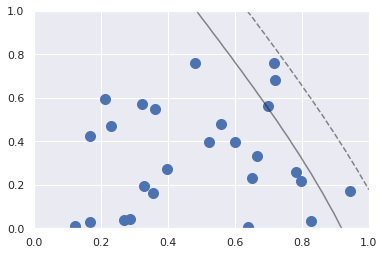

In [ ]:
#Experiment 5 -> Polynomial Kernel (degree = 5), C=1000
poly_model2 = SVC(kernel='poly', C=1000, degree=5)
poly_model2.fit(X_pca, y)

#Predict
y_pred_poly2 = poly_model2.predict(X_pca)

#Loss Calculation
err_poly2 = hinge_loss(y, y_pred_poly2)
err_poly2 = round(err_poly2,4) #optional, but it makes it easier to compare with the eye
print("Loss Polynomial Kernel and C=1000: ", err_poly2)

plot_svc_decision_function(poly_model2);